# Chapter 8: Complexity
by [Arief Rahman Hakim](https://github.com/ahman24)


## 1. Complexity and Big-O Notation
The **complexity** of a function is the relationship between the `size of the input` and the `difficulty of running the function` to completion. The **size** of the input is usually denoted by `n`. However, `n` usually describes something more tangible, such as the `length of an array`. The **difficulty** of a problem can be measured by basic operations: additions, subtractions, multiplications, divisions, assignments, and function calls.

In [1]:
def f(n):
    out = 0
    for i in range(n):
        for j in range(n):
            out += i*j
            
    return out

* additions: $n^2$, 
* subtractions: 0, 
* multiplications: $n^2$, 
* divisions: 0, 
* assignments: $2n^2+1$, 
* function calls: 0, 
* total: $4n^2+1$.

A common notation for complexity is called **Big-O notation**. **Big-O notation** establishes the relationship in the growth of the number of basic operations with respect to the size of the input as the input size becomes very large. In the previous example, we counted $4n^2+n+1$ basic operations to complete the function. In Big-O notation we would say that the function is $O(n^2)$ (pronounced **“O of n-squared”**). 

Here is another example,

In [2]:
def my_fib_iter(n):
    
    out = [1, 1]
    
    for i in range(2, n):
        out.append(out[i - 1] + out[i - 2])
        
    return out

From the code above, the complexity would be $O(n)$ since the time needed will increase linearly as the `n` increases.

Let's check another example,

In [3]:
def my_fib_rec(n):
    
    if n < 2:
        out = 1
    else:
        out = my_fib_rec(n-1) + my_fib_rec(n-2)
        
    return out

As `n` gets large, we can say that the vast majority of function calls make two other function calls: 
* one addition,
* one assignment to the output. 

The addition and assignment **do not grow with n** per function call, so we can ignore them in Big-O notation. However, the number of function calls grows **approximately** by $2^n$ , and so the complexity of `my_fib_rec` is upper bound by $O(2^n)$.

Let's take a look on another example,

In [4]:
def my_divide_by_two(n):
    
    out = 0
    while n > 1:
        n /= 2
        out += 1
        
    return out

The **while-loop** cuts `n` in half in every iteration until n is less than 1. So the number of iterations, `I`, is the solution to the equation $\frac{n}{2^I}=1$. With some manipulation, this solves to $I=\log {n}$, so the complexity of `my_divide_by_two` is $O(\log {n})$. It does not matter what the base of the log is because, recalling log rules, all logs are a scalar multiple of each other. Any function with complexity $O(\log {n})$ is said to be log time.

## 2. Complexity Matters
The **complexity** of a function is the relationship between the `size of the input` and the `difficulty of running the function` to completion. The **size** of the input is usually denoted by `n`. However, `n` usually describes something more tangible, such as the `length of an array`. The **difficulty** of a problem can be measured by basic operations: additions, subtractions, multiplications, divisions, assignments, and function calls.

<img src="img/08.02.01-complexity.png" alt="Complexity" width="200"/>

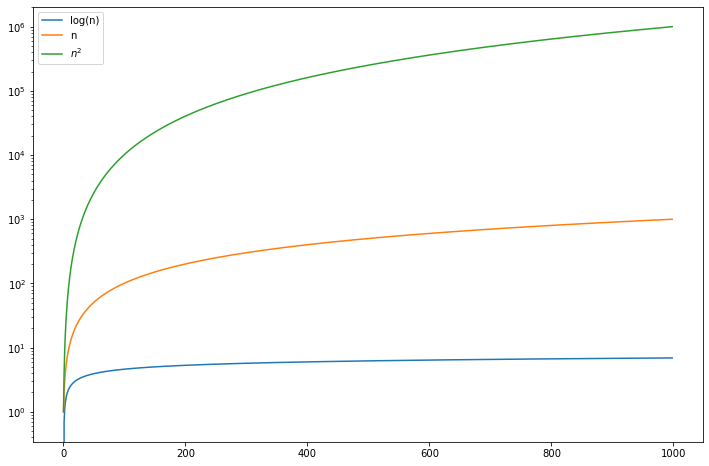

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12, 8))
n = np.arange(1, 1e3)
plt.plot(np.log(n), label = 'log(n)')
plt.plot(n, label = 'n')
plt.plot(n**2, label = '$n^2$')
#plt.plot(2**n, label = '$2^n$')
plt.yscale('log')
plt.legend()
plt.show()

The figures above illustrate the importance of reducing the complexity of the program we made if possible. As the complexity reduced, the program is **expected to run faster relatively**.  
At computing-intensive program, this helps increase the overall performance.

## 3. The Profiler
We could investigate the bottleneck of our program by using the profilers. There are 3 Profilers accessible:
* Magic command
* Python profiler
* Line profiler


### 3.A Magic Command
We could use magic command in Jupyter. There are 3 magic commands:
* `%time` : single percent time only for a single statement.
* `%%time` : double percent time for all lines in a given cell
* `%timeit` : Get the repeated run time of a given line
* `%%timeit` : Get the repeated run time of a given cell

In [7]:
%time sum(range(200))

Wall time: 974 µs


19900

In [9]:
%%time
s = 0
for i in range(200):
    s += i

Wall time: 0 ns


In [8]:
%timeit sum(range(200))

2.36 µs ± 82.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 3.B Python Profiler
We could also use the Python profiler. In Jupyter notebook the magic commands are:
* `%prun` : Run a single statement through the python code profiler
* `%%prun`: Run a cell through the python code profiler

In [10]:
import numpy as np
def slow_sum(n, m):

    for i in range(n):
        # we create a size m array of random numbers
        a = np.random.rand(m)

        s = 0
        # in this loop we iterate through the array
        # and add elements to the sum one by one
        for j in range(m):
            s += a[j]   

In [11]:
%prun slow_sum(1000, 10000)

         1004 function calls in 3.251 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    3.155    3.155    3.251    3.251 <ipython-input-10-667afdf7906f>:2(slow_sum)
     1000    0.096    0.000    0.096    0.000 {method 'rand' of 'numpy.random.mtrand.RandomState' objects}
        1    0.000    0.000    3.251    3.251 {built-in method builtins.exec}
        1    0.000    0.000    3.251    3.251 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

> "**ncalls**: for the number of calls",  
"**tottime**: for the total time spent in the given function (and excluding time made in calls to sub-functions),"  
"**percall**: is the quotient of tottime divided by ncalls",  
"**cumtime** is the total time spent in this and all subfunctions (from invocation till exit). This figure is accurate even for recursive functions",  
"**percall** is the quotient of cumtime divided by primitive calls\n"

### 3.C Line Profiler
We could also profile line-wise of our code by using the `line_profiler` package.  
Before usage, we need to load the package,

In [13]:
%load_ext line_profiler

In [14]:
%lprun -f slow_sum slow_sum(1000, 10000)

Timer unit: 1e-07 s

Total time: 12.5047 s
File: <ipython-input-10-667afdf7906f>
Function: slow_sum at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def slow_sum(n, m):
     3                                           
     4      1001       5651.0      5.6      0.0      for i in range(n):
     5                                                   # we create a size m array of random numbers
     6      1000    1119311.0   1119.3      0.9          a = np.random.rand(m)
     7                                           
     8      1000      10085.0     10.1      0.0          s = 0
     9                                                   # in this loop we iterate through the array
    10                                                   # and add elements to the sum one by one
    11  10001000   44507859.0      4.5     35.6          for j in range(m):
    12  10000000   79404424.0      7.9     63.5              s += 

We could see profile of the code line-wise. The **line 10 and 11 takes the majority time** of the total running time. When theres a bottleneck on your program, focus on improving that first. It might give big improvement.

## 4. Problem
### Q1 and Q2
How would you define the size and complexity of the following tasks?
* Solving a jigsaw puzzle.
> size: $n^2$  
> complexity: $O(n^2)$
* Passing a handout to a class.
> size: $n$  
> complexity: $O(n)$
* Walking to class.
> size: $constant$  
> complexity: $O(constant)$
* Finding a name in dictionary.
> size: ?  
> complexity: ?

## 5. Notes
### 5.A
There is a $O(\log {n})$ algorithm for finding a word in an `n-word dictionary`. Instead of starting at the beginning of the list, you go to the middle. If this is the word you are looking for then you are done. If the word comes after the word you are looking for, then look halfway between the current word and the end. If it is before the word you are looking for, then look halfway between the first word and the current word. Keep repeating this process until you find the word. This algorithm is known as a **binary search**.

### 5.B
There is a way to look up a word in $O(1)$ or constant time. This means that no matter how long the list is, it takes the same amount of time! The algorithm is called `hash functions`.